Spam SMS Detection

Dataset:
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Objective:
Build an AI model that can classify SMS messages as spam or legitimate. Use techniques like TF-IDF or word embeddings with classifiers like Naive Bayes, Logistic Regression, or Support Vector Machines to identify spam messages


Step 1: Read the File & Set Up Variables
🔹 Goal:
Load the data and check what it contains.

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd

import gdown

# Google Drive File IDs for train and test datasets
spam_file = "1pntss5F6vlQaqfPbftnaqTTgp_K5mZFt"

# Constructing downloadable URLs using file IDs
url = f"https://drive.google.com/uc?export=download&id={spam_file}"

# Output filenames for downloaded CSVs
output_train_file = "spam.csv"

# Download the datasets to the current Colab environment
gdown.download(url, output_train_file, quiet=False)


df = pd.read_csv("spam.csv",encoding='ISO-8859-1')

# Step 3: Look at the first few rows
print(df.head())

# Step 4: See what columns exist
print(df.columns)


Downloading...
From: https://drive.google.com/uc?export=download&id=1pntss5F6vlQaqfPbftnaqTTgp_K5mZFt
To: /content/spam.csv
100%|██████████| 504k/504k [00:00<00:00, 105MB/s]

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


Step 2: Clean the Data
The dataset has extra useless columns. We’ll:

Keep only the useful ones

Rename them

Remove any empty rows

In [ ]:
# Step 1: Keep only the two useful columns: v1 (label) and v2 (text message)
df = df[['v1', 'v2']]

# Step 2: Rename them for clarity
df.columns = ['label', 'message']

# Step 3: Drop any missing values (just in case)
df.dropna(inplace=True)

<ipython-input-11-d93162216468>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Step 3: Convert Labels to Numbers
Machine learning needs numbers, not text. So we convert:

ham → 0

spam → 1

In [ ]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


Step 4: Add Message Length (for analysis)
We now calculate the number of characters in each message:

In [ ]:
df['message_length'] = df['message'].apply(len)

# Step 3: Look at the first few rows
print(df.head())

# Step 4: See what columns exist
print(df.columns)

  label                                            message  label_num  \
0   ham  Go until jurong point, crazy.. Available only ...          0   
1   ham                      Ok lar... Joking wif u oni...          0   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1   
3   ham  U dun say so early hor... U c already then say...          0   
4   ham  Nah I don't think he goes to usf, he lives aro...          0   

   message_length  
0             111  
1              29  
2             155  
3              49  
4              61  
Index(['label', 'message', 'label_num', 'message_length'], dtype='object')


Step 5: Plot Basic Graphs (Optional for Report)
You can skip these if you only want modeling, but they're good for visuals:

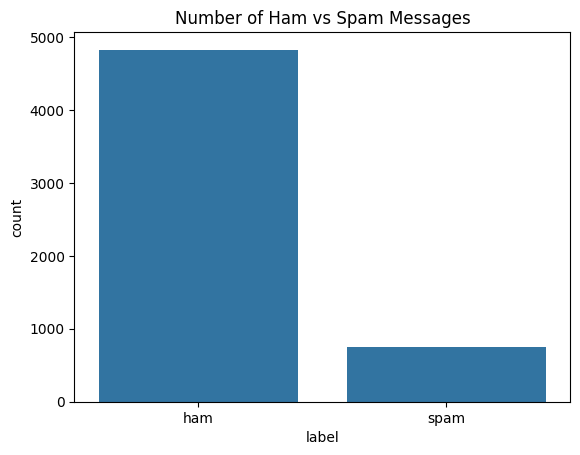

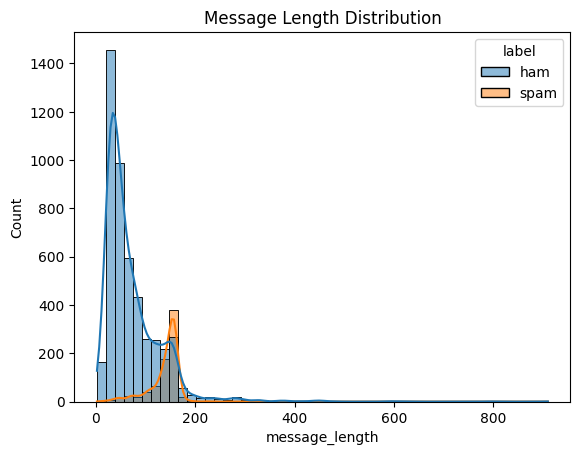

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of ham vs spam
sns.countplot(x='label', data=df)
plt.title("Number of Ham vs Spam Messages")
plt.show()

# Message length distribution
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title("Message Length Distribution")
plt.show()


Step 6: Split Data into Train/Test
We split into training and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

# Existing split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42)

# ✅ Reset index so we can slice correctly later
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


Step 7: Convert Text to Numbers (TF-IDF)
We use a tool called TF-IDF Vectorizer:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

import numpy as np

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Get TF-IDF scores for spam messages only
spam_indices = y_train[y_train == 1].index
spam_tfidf = X_train_tfidf[spam_indices]

# Calculate mean TF-IDF score per word for spam
mean_scores = np.asarray(spam_tfidf.mean(axis=0)).flatten()

# Top 20 spam words
top_indices = mean_scores.argsort()[::-1][:20]
top_words = [(feature_names[i], mean_scores[i]) for i in top_indices]

# Display
print("🔝 Top 20 Spam Words (by avg TF-IDF):")
for word, score in top_words:
    print(f"{word:<15} -> {score:.4f}")


🔝 Top 20 Spam Words (by avg TF-IDF):
free            -> 0.0459
txt             -> 0.0332
mobile          -> 0.0305
claim           -> 0.0287
stop            -> 0.0264
text            -> 0.0249
prize           -> 0.0248
ur              -> 0.0244
reply           -> 0.0237
www             -> 0.0233
cash            -> 0.0202
won             -> 0.0200
new             -> 0.0181
urgent          -> 0.0180
uk              -> 0.0172
nokia           -> 0.0170
150p            -> 0.0165
win             -> 0.0161
service         -> 0.0160
50              -> 0.0157


Step 8: Train Models
We try two models: Naive Bayes and Logistic Regression.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

Step 9: Check Accuracy
We test how well the model performs:

Naive Bayes:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



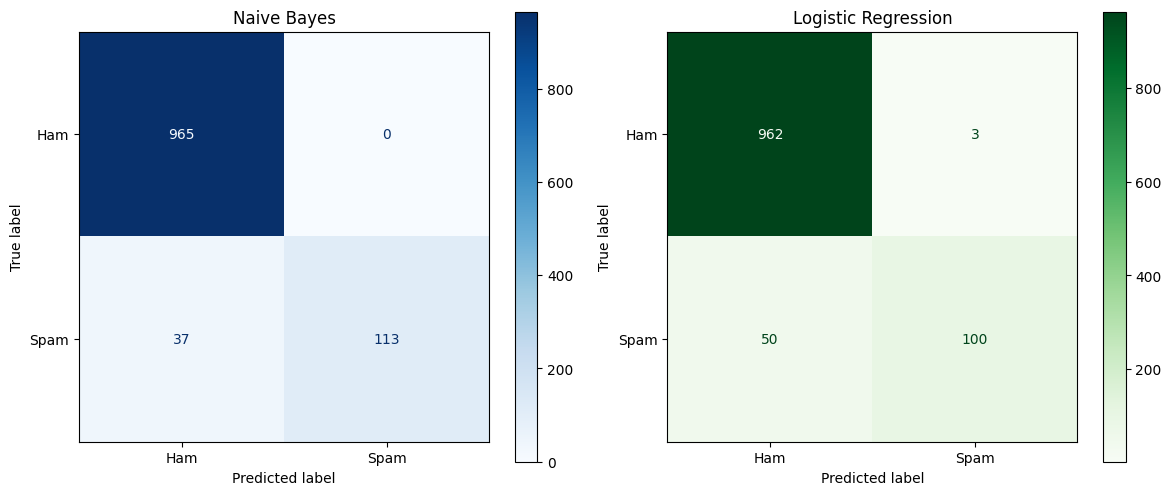

In [ ]:
from sklearn.metrics import classification_report

# Predictions
nb_preds = nb_model.predict(X_test_tfidf)
lr_preds = lr_model.predict(X_test_tfidf)

# Evaluation
print("Naive Bayes:\n", classification_report(y_test, nb_preds))
print("Logistic Regression:\n", classification_report(y_test, lr_preds))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Predict on the test set
nb_preds = nb_model.predict(X_test_tfidf)
lr_preds = lr_model.predict(X_test_tfidf)

# Step 2: Create confusion matrices
cm_nb = confusion_matrix(y_test, nb_preds)
cm_lr = confusion_matrix(y_test, lr_preds)

# Step 3: Plot them side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Naive Bayes
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=["Ham", "Spam"])
disp_nb.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title("Naive Bayes")

# Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Ham", "Spam"])
disp_lr.plot(ax=axes[1], cmap='Greens', values_format='d')
axes[1].set_title("Logistic Regression")

plt.tight_layout()
plt.show()



In [ ]:
#evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Naive Bayes
nb_preds = nb_model.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, nb_preds)
precision_nb = precision_score(y_test, nb_preds)
recall_nb = recall_score(y_test, nb_preds)
f1_nb = f1_score(y_test, nb_preds)

# Logistic Regression
lr_preds = lr_model.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, lr_preds)
precision_lr = precision_score(y_test, lr_preds)
recall_lr = recall_score(y_test, lr_preds)
f1_lr = f1_score(y_test, lr_preds)

# Print side-by-side comparison
print("=== Model Performance Comparison ===")
print(f"{'Metric':<12}{'Naive Bayes':<15}{'Logistic Regression'}")
print(f"{'Accuracy':<12}{accuracy_nb:<15.4f}{accuracy_lr:.4f}")
print(f"{'Precision':<12}{precision_nb:<15.4f}{precision_lr:.4f}")
print(f"{'Recall':<12}{recall_nb:<15.4f}{recall_lr:.4f}")
print(f"{'F1-Score':<12}{f1_nb:<15.4f}{f1_lr:.4f}")

# Step 4: Evaluate
models = {
    "Naive Bayes": nb_preds,
    "Logistic Regression": lr_preds
}

results = {}

for name, preds in models.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

# Step 5: Print results
print("=== Model Comparison ===")
for model, metrics in results.items():
    print(f"{model}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name.capitalize()}: {value:.4f}")
    print()

# Step 6: Select best model by F1-Score
best_model_name = max(results, key=lambda name: results[name]["f1_score"])
print(f"✅ Best model based on F1-score: {best_model_name}")



import joblib

# Save to local Colab environment
joblib.dump(best_model_name, 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

from google.colab import files

# Download the files
files.download('spam_classifier_model.pkl')
files.download('tfidf_vectorizer.pkl')


=== Model Performance Comparison ===
Metric      Naive Bayes    Logistic Regression
Accuracy    0.9668         0.9525
Precision   1.0000         0.9709
Recall      0.7533         0.6667
F1-Score    0.8593         0.7905
=== Model Comparison ===
Naive Bayes:
  Accuracy: 0.9668
  Precision: 1.0000
  Recall: 0.7533
  F1_score: 0.8593

Logistic Regression:
  Accuracy: 0.9525
  Precision: 0.9709
  Recall: 0.6667
  F1_score: 0.7905

✅ Best model based on F1-score: Naive Bayes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📢 Top spam-indicating words:
txt             -> 4.467
mobile          -> 3.790
claim           -> 3.705
free            -> 3.623
www             -> 3.448
stop            -> 3.347
uk              -> 3.250
reply           -> 3.068
50              -> 2.987
service         -> 2.949
150p            -> 2.790
new             -> 2.768
prize           -> 2.766
text            -> 2.661
urgent          -> 2.418
cash            -> 2.379
won             -> 2.352
win             -> 2.226
18              -> 2.124
com             -> 2.098

💬 Top ham-indicating words:
ok              -> -1.857
lt              -> -1.687
gt              -> -1.681
ll              -> -1.596
come            -> -1.440
going           -> -1.368
home            -> -1.332
got             -> -1.321
da              -> -1.271
lor             -> -1.203
way             -> -1.169
good            -> -1.155
later           -> -1.139
hey             -> -1.104
sorry           -> -1.094
sir             -> -1.094
like            -> -1.070


/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


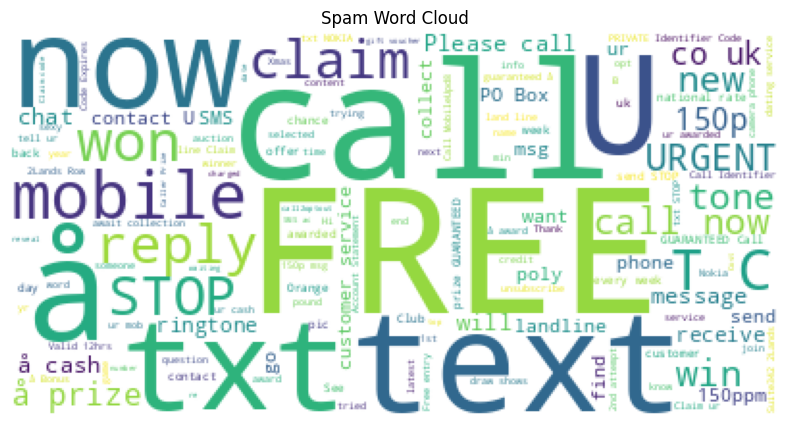

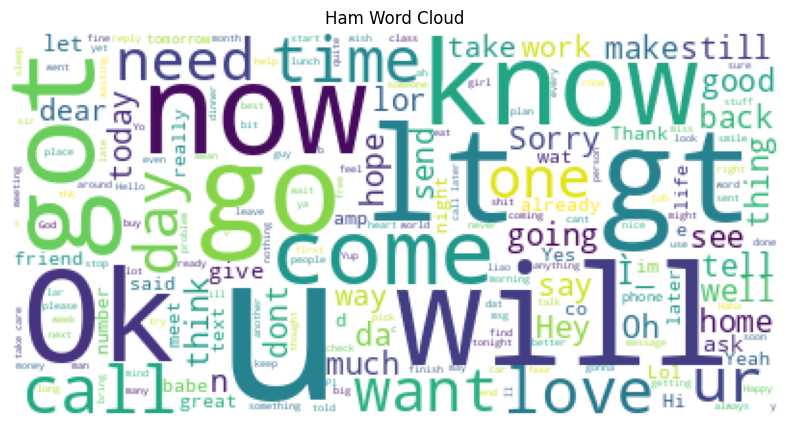

In [ ]:
#Feature Importance
#1. Feature Importance (Logistic Regression Coefficients)
# Understand which words push a message toward spam or ham.

import numpy as np

# Get feature names and model coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = lr_model.coef_[0]

# Create tuples (word, coefficient)
word_importance = list(zip(feature_names, coefficients))

# Sort
top_spam = sorted(word_importance, key=lambda x: x[1], reverse=True)[:20]
top_ham = sorted(word_importance, key=lambda x: x[1])[:20]

print("📢 Top spam-indicating words:")
for word, coef in top_spam:
    print(f"{word:<15} -> {coef:.3f}")

print("\n💬 Top ham-indicating words:")
for word, coef in top_ham:
    print(f"{word:<15} -> {coef:.3f}")

# SHAP Values (Deep Insights into Any Model)
import shap

# Create explainer for logistic regression
explainer = shap.LinearExplainer(lr_model, X_train_tfidf, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_tfidf)

# Visualize explanation for 1 test message
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], feature_names=vectorizer.get_feature_names_out())

#Word Clouds for Spam/Ham
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate spam and ham messages
spam_words = ' '.join(df[df['label_num'] == 1]['message'])
ham_words = ' '.join(df[df['label_num'] == 0]['message'])

# Plot spam cloud
plt.figure(figsize=(10, 5))
plt.title("Spam Word Cloud")
plt.imshow(WordCloud(background_color='white').generate(spam_words))
plt.axis("off")
plt.show()

# Plot ham cloud
plt.figure(figsize=(10, 5))
plt.title("Ham Word Cloud")
plt.imshow(WordCloud(background_color='white').generate(ham_words))
plt.axis("off")
plt.show()

